In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import shutil
from sklearn.model_selection import train_test_split
import cv2 as cv
import numpy as np

In [2]:
ListeComposantPC = []

proportion_train = 0.8
donnees_train = []
donnees_test = []

In [3]:
for element in os.listdir("pc_parts"):
    chemin_element = os.path.join("pc_parts", element)
    if os.path.isdir(chemin_element):
        ListeComposantPC.append(element)

In [4]:
donnees = []
etiquettes = []

for idx, composant in enumerate(ListeComposantPC):
    chemin_composant = os.path.join("pc_parts", composant)
    fichiers = [f for f in os.listdir(chemin_composant) if os.path.isfile(os.path.join(chemin_composant, f))]
    
    for fichier in fichiers:
        img_path = os.path.join(chemin_composant, fichier)
        img = cv.imread(img_path)
        
        if img is not None:
            donnees.append(img) 
            etiquettes.append(idx)

donnees = np.array(donnees)
etiquettes = np.array(etiquettes)
X_train, X_test, Y_train, Y_test = train_test_split(donnees, etiquettes, test_size=1-proportion_train, random_state=42)

print(f"Données d'entraînement : {X_train.shape}, Étiquettes d'entraînement : {Y_train.shape}")
print(f"Données de test : {X_test.shape}, Étiquettes de test : {Y_test.shape}")

Données d'entraînement : (2623, 256, 256, 3), Étiquettes d'entraînement : (2623,)
Données de test : (656, 256, 256, 3), Étiquettes de test : (656,)


In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(ListeComposantPC)))  # Ajustement ici pour correspondre au nombre réel de classes



In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))




Epoch 1/10




InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "c:\Python39\lib\runpy.py", line 197, in _run_module_as_main

  File "c:\Python39\lib\runpy.py", line 87, in _run_code

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 982, in launch_instance

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelapp.py", line 712, in start

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 215, in start

  File "c:\Python39\lib\asyncio\base_events.py", line 596, in run_forever

  File "c:\Python39\lib\asyncio\base_events.py", line 1890, in _run_once

  File "c:\Python39\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 730, in execute_request

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 383, in do_execute

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\ipykernel\zmqshell.py", line 528, in run_cell

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code

  File "C:\Users\User\AppData\Local\Temp\ipykernel_19404\3414915982.py", line 5, in <module>

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 13 which is outside the valid range of [0, 10).  Label values: 7 6 0 4 3 4 6 13 1 0 0 8 3 8 1 3 8 11 9 11 11 11 9 3 13 4 2 9 8 12 13 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1446]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

Epoch 1/10


82/82 [==============================] - 74s 850ms/step - loss: 2.6765 - accuracy: 0.0888 - val_loss: 2.5730 - val_accuracy: 0.1265
Epoch 2/10
82/82 [==============================] - 70s 860ms/step - loss: 2.4082 - accuracy: 0.2192 - val_loss: 2.2898 - val_accuracy: 0.2744
Epoch 3/10
82/82 [==============================] - 71s 863ms/step - loss: 1.8205 - accuracy: 0.4300 - val_loss: 2.3396 - val_accuracy: 0.2881
Epoch 4/10
82/82 [==============================] - 74s 905ms/step - loss: 1.0925 - accuracy: 0.6763 - val_loss: 2.6263 - val_accuracy: 0.2927
Epoch 5/10
82/82 [==============================] - 72s 880ms/step - loss: 0.6358 - accuracy: 0.8326 - val_loss: 3.3304 - val_accuracy: 0.3110
Epoch 6/10
82/82 [==============================] - 71s 862ms/step - loss: 0.4425 - accuracy: 0.9100 - val_loss: 3.1519 - val_accuracy: 0.3018
Epoch 7/10
82/82 [==============================] - 72s 884ms/step - loss: 0.3379 - accuracy: 0.9375 - val_loss: 3.6249 - val_accuracy: 0.33

In [ ]:
def AfficherImage(cheminImage):
    img = mpimg.imread(cheminImage)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

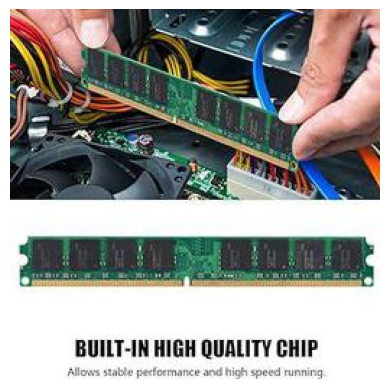

pc_parts\ram\196.jpg


In [ ]:
def AfficherImageRandom():
    PCpartie = random.choice(ListeComposantPC)
    chemin_PCpartie = os.path.join("pc_parts", PCpartie)
    fichiers = os.listdir(chemin_PCpartie)
    image_random = random.choice(fichiers)
    chemin_image = os.path.join(chemin_PCpartie, image_random)
    AfficherImage(chemin_image)
    return chemin_image

print(AfficherImageRandom())